In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd

In [10]:
!pip3 install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 10.7 MB/s eta 0:00:00
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
# vi lager først et datasett

lonn = np.array([1000,2000, 3000, 4000, 1000, 2000, 3000, 4000, 8000, 10000, 15000,
             23000, 30000, 40000, 45000, 60000,26000, 35000, 40000, 45000, 70000,]) # lønn
alder = np.array([20, 20, 22, 19, 26, 23, 30, 30, 28, 20, 34, 50, 53, 47, 30, 35, 34, 41, 46, 30, 31]) # student
student = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

data = {"student":student, 
        "månedslønn":lonn,
       "alder": alder}

df = pd.DataFrame(data = data)
df.head()

,student,månedslønn,alder
0,1,1000,20
1,1,2000,20
2,1,3000,22
3,1,4000,19
4,1,1000,26


## Lineær regresjon

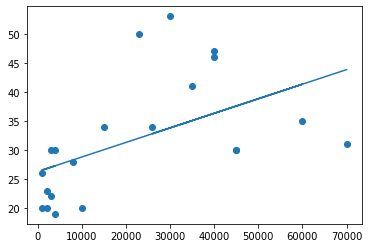

In [7]:
# bruker bare kontinuerlige verdier
x = lonn
y = alder

w, b = np.polyfit(x, y, 1) # regner ut vektene og skjæringspunktet
plt.scatter(x, y)
plt.plot(x, w*x + b) # plotter decision boundary med regresjonsfunksjon
plt.show()

### Trene en lineær regresjonsmodell

In [8]:
# Vi må gjøre dataen todimensjonell før vi kan trene
x = lonn.reshape(-1,1)
y = alder.reshape(-1,1)

linear = LinearRegression()
linear.fit(x,y)
linear.predict([[50000]])

array([[38.80904072]])

## Logistisk Regresjon

<AxesSubplot:xlabel='alder', ylabel='student'>

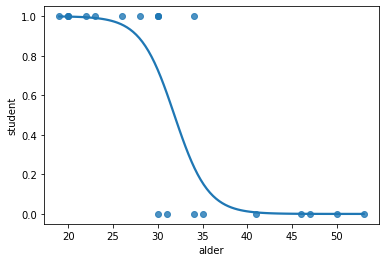

In [11]:
# setter y til å være en probabilistisk verdi
x = df['alder']
y = df['student']

sb.regplot(x=x, y=y, data=df, logistic=True, ci=None) # denne inneholder sigmoid-funksjonen


### Trene en logistisk regresjonsmodell

In [21]:
# Vi må gjøre dataen todimensjonell før vi kan trene
x = alder.reshape(-1,1)
y = student.reshape(-1,1)

logistic = LogisticRegression()
logistic.fit(x,y)
logistic.predict([[20],[50]]) # predikerer sannsynlighet

/Users/lilja/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0])